In [17]:
import pandas as pd

In [18]:
rawData = pd.read_csv("kosuli_casa_moda.csv")
rawData.head(5)

,Name,Price,Sizes,Image_URL,Product_URL
0,CM098 REGULAR FIT LONG SLEEVE BLUE,1500 ДЕН,"L, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...
1,CM095 REGULAR FIT LONG SLEEVE SILVER,1500 ДЕН,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...
2,CM094 REGULAR FIT LONG SLEEVE RED/SILVER,1500 ДЕН,"XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...
3,CM091 REGULAR FIT LONG SLEEVE BLUE/WHITE,1500 ДЕН,"L, XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...
4,CM089 REGULAR FIT LONG SLEEVE ORANGE,1500 ДЕН,"XL, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm089-regular-fit-lo...


In [19]:
rawData.isnull().sum()

Name           0
Price          0
Sizes          1
Image_URL      0
Product_URL    0
dtype: int64

In [20]:
#Strips whitespace and standardize the Name column to title case.
rawData['Name'] = rawData['Name'].str.strip().str.title()

In [21]:
rawData.head(5)

,Name,Price,Sizes,Image_URL,Product_URL
0,Cm098 Regular Fit Long Sleeve Blue,1500 ДЕН,"L, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...
1,Cm095 Regular Fit Long Sleeve Silver,1500 ДЕН,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...
2,Cm094 Regular Fit Long Sleeve Red/Silver,1500 ДЕН,"XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...
3,Cm091 Regular Fit Long Sleeve Blue/White,1500 ДЕН,"L, XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...
4,Cm089 Regular Fit Long Sleeve Orange,1500 ДЕН,"XL, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm089-regular-fit-lo...


In [22]:
# 3. Clean and convert 'Price' to numeric
#    - Remove any non-digit or dot characters
#    - Convert to float
#Price is currently stored as an object (string). You’ll want to strip currency symbols ($, €, etc.) and convert it to a numeric type (float).

rawData[['Price_amount', 'Currency']] = (
    rawData['Price']
        .str.extract(r'([\d\.]+)\s*(\D+)', expand=True)
)

# 4. Convert the numeric part to float
rawData['Price_amount'] = rawData['Price_amount'].astype(float)


In [23]:
rawData.head(5)

,Name,Price,Sizes,Image_URL,Product_URL,Price_amount,Currency
0,Cm098 Regular Fit Long Sleeve Blue,1500 ДЕН,"L, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500.0,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,1500 ДЕН,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500.0,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,1500 ДЕН,"XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500.0,ДЕН
3,Cm091 Regular Fit Long Sleeve Blue/White,1500 ДЕН,"L, XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500.0,ДЕН
4,Cm089 Regular Fit Long Sleeve Orange,1500 ДЕН,"XL, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm089-regular-fit-lo...,1500.0,ДЕН


In [24]:
# Keep *all* rows, and *all* columns from index 1 onward
# 1. Copy the columns index to a mutable list
cols = list(rawData.columns)

# 2. Rename the first element
cols[1] = 'Price_str'

# 3. Assign it back
rawData.columns = cols

# Now columns looks like ['Price_str', 'Price', 'Currency', ...]

# 4. Drop only that renamed column
rawData = rawData.drop(columns=['Price_str'])


In [25]:
rawData.head(5)

,Name,Sizes,Image_URL,Product_URL,Price_amount,Currency
0,Cm098 Regular Fit Long Sleeve Blue,"L, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500.0,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500.0,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,"XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500.0,ДЕН
3,Cm091 Regular Fit Long Sleeve Blue/White,"L, XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500.0,ДЕН
4,Cm089 Regular Fit Long Sleeve Orange,"XL, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm089-regular-fit-lo...,1500.0,ДЕН


In [26]:
rawData = rawData.rename(columns={'Price_amount': 'Цена', 'Currency': 'Валута', 'Name':'Име', 'Sizes':'Величини', 'Image_URL':'Линк до слика на продукт', 'Product_URL':'Линк до продукт','Price':'Цена'})

In [27]:
rawData.head(4)

,Име,Величини,Линк до слика на продукт,Линк до продукт,Цена,Валута
0,Cm098 Regular Fit Long Sleeve Blue,"L, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500.0,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500.0,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,"XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500.0,ДЕН
3,Cm091 Regular Fit Long Sleeve Blue/White,"L, XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500.0,ДЕН


In [28]:
# After you’ve got your float column, e.g. Price_amount:
rawData['Цена'] = rawData['Цена'].astype(int)

In [29]:
rawData.head(4)

,Име,Величини,Линк до слика на продукт,Линк до продукт,Цена,Валута
0,Cm098 Regular Fit Long Sleeve Blue,"L, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,"XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500,ДЕН
3,Cm091 Regular Fit Long Sleeve Blue/White,"L, XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500,ДЕН


In [30]:
#missing values in sizes

rawData['Величини'] = rawData['Величини'].fillna('Нема достапна велчина')

In [31]:
rawData.isnull().sum()

Име                         0
Величини                    0
Линк до слика на продукт    0
Линк до продукт             0
Цена                        0
Валута                      0
dtype: int64

In [32]:
# 5. Split comma-separated 'Sizes' into lists and normalize text
rawData['Величини'] = (
    rawData['Величини']
    .str.split(',')
    .apply(lambda lst: [s.strip().upper() for s in lst])
)

In [33]:
rawData.head(4)

,Име,Величини,Линк до слика на продукт,Линк до продукт,Цена,Валута
0,Cm098 Regular Fit Long Sleeve Blue,"[L, XXL, 4XL]",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,[XXL],https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,"[XXL, ]",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500,ДЕН
3,Cm091 Regular Fit Long Sleeve Blue/White,"[L, XXL, ]",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500,ДЕН


In [34]:
# Remove any empty or whitespace-only strings from the lists
rawData['Величини'] = rawData['Величини'].apply(
    lambda lst: [s for s in lst if s and s.strip() != '']
)

In [35]:
rawData.head(3)

,Име,Величини,Линк до слика на продукт,Линк до продукт,Цена,Валута
0,Cm098 Regular Fit Long Sleeve Blue,"[L, XXL, 4XL]",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,[XXL],https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,[XXL],https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500,ДЕН


In [36]:
size_map = {
    'SMALL': 'S',
    'MEDIUM': 'M',
    'LARGE': 'L',
    'EXTRA SMALL': 'XS',
    'EXTRA LARGE': 'XL',
    'EXTRA EXTRA LARGE': 'XXL',
    'EXTRA EXTRA EXTRA LARGE': '3XL',
    'EXTRA EXTRA EXTRA EXTRA LARGE': '4XL',
    'EXTRA EXTRA EXTRA EXTRA EXTRA LARGE': '5XL'
}
rawData['Величини'] = rawData['Величини'].apply(lambda lst: [size_map.get(s, s) for s in lst])

In [37]:
size_map

{'SMALL': 'S',
 'MEDIUM': 'M',
 'LARGE': 'L',
 'EXTRA SMALL': 'XS',
 'EXTRA LARGE': 'XL',
 'EXTRA EXTRA LARGE': 'XXL',
 'EXTRA EXTRA EXTRA LARGE': '3XL',
 'EXTRA EXTRA EXTRA EXTRA LARGE': '4XL',
 'EXTRA EXTRA EXTRA EXTRA EXTRA LARGE': '5XL'}

In [38]:
# 7. Ensure URLs start with http:// or https://
def ensure_http(url):
    url = str(url).strip()
    if not url.lower().startswith(('http://', 'https://')):
        return 'http://' + url
    return url

rawData['Линк до слика на продукт']   = rawData['Линк до слика на продукт'].apply(ensure_http)
rawData['Линк до продукт	'] = rawData['Линк до продукт'].apply(ensure_http)

In [39]:
rawData.to_csv('kosuli_casa_moda_cleaned.csv', index=False)

In [40]:
cleanedData = pd.read_csv("kosuli_casa_moda_cleaned.csv")
cleanedData.head(5)

,Име,Величини,Линк до слика на продукт,Линк до продукт,Цена,Валута,Линк до продукт\t
0,Cm098 Regular Fit Long Sleeve Blue,"['L', 'XXL', '4XL']",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500,ДЕН,https://kosuli.mk/product/cm098-regular-fit-lo...
1,Cm095 Regular Fit Long Sleeve Silver,['XXL'],https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500,ДЕН,https://kosuli.mk/product/cm095-regular-fit-lo...
2,Cm094 Regular Fit Long Sleeve Red/Silver,['XXL'],https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500,ДЕН,https://kosuli.mk/product/cm094-regular-fit-lo...
3,Cm091 Regular Fit Long Sleeve Blue/White,"['L', 'XXL']",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500,ДЕН,https://kosuli.mk/product/cm091-regular-fit-lo...
4,Cm089 Regular Fit Long Sleeve Orange,"['XL', 'XXL', '4XL']",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm089-regular-fit-lo...,1500,ДЕН,https://kosuli.mk/product/cm089-regular-fit-lo...


In [41]:
cleanedData = cleanedData.drop(columns=['Линк до продукт\t'])

In [42]:
cleanedData

,Име,Величини,Линк до слика на продукт,Линк до продукт,Цена,Валута
0,Cm098 Regular Fit Long Sleeve Blue,"['L', 'XXL', '4XL']",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,['XXL'],https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,['XXL'],https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500,ДЕН
3,Cm091 Regular Fit Long Sleeve Blue/White,"['L', 'XXL']",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500,ДЕН
4,Cm089 Regular Fit Long Sleeve Orange,"['XL', 'XXL', '4XL']",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm089-regular-fit-lo...,1500,ДЕН
5,Cm088 Regular Fit Long Sleeve Red,"['XL', 'XXL']",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm088-regular-fit-lo...,1500,ДЕН
6,Cm087 Regular Fit Long Sleeve,['XXL'],https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm087-regular-fit-lo...,1500,ДЕН
7,Cm086 Regular Fit Long Sleeve Blue,['2XL'],https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm086-regular-fit-lo...,1500,ДЕН
8,Cm083 Regular Fit Long Sleeve Blue,"['L', 'XL', 'XXL', '4XL', '5XL']",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm083-regular-fit-lo...,1500,ДЕН
9,Cm082 Regular Fit Long Sleeve Red,"['XXL', '5XL']",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm082-regular-fit-lo...,1500,ДЕН


In [43]:
cleanedData.to_csv('kosuli_casa_moda_cleaned.csv', index=False)

In [44]:
import pandas as pd
import json

In [45]:
stand_data = pd.read_csv('kosuli_casa_moda_cleaned.csv')

In [46]:
import ast, json

# 1) Parse & standardize sizes
stand_data['sizes_list'] = stand_data['Величини'].apply(ast.literal_eval)
stand_data['std_sizes'] = stand_data['sizes_list'].apply(lambda L: [s.strip().upper() for s in L])

# 2) Rename your link columns once for all
stand_data = stand_data.rename(columns={
    'Линк до слика на продукт': 'линк_слика',
    'Линк до продукт':          'линк_продукт'
})

# 3) Use the renamed columns in make_attributes
def make_attributes(row):
    return {
        "величини":     row['std_sizes'],
        "линк_слика":   row['линк_слика'],    # <-- not the old name
        "линк_продукт": row['линк_продукт'],  # <-- not the old name
        "цена":         row['Цена'],
        "валута":       row['Валута']
    }

# 4) Create the JSON column
stand_data['attributes_json'] = stand_data.apply(
    lambda r: json.dumps(make_attributes(r), ensure_ascii=False),
    axis=1
)

# 5) Quick sanity check
print(stand_data.columns.tolist())
print(stand_data[['std_sizes','линк_слика','линк_продукт','attributes_json']].head())


['Име', 'Величини', 'линк_слика', 'линк_продукт', 'Цена', 'Валута', 'sizes_list', 'std_sizes', 'attributes_json']
        std_sizes                                         линк_слика  \
0   [L, XXL, 4XL]  https://kosuli.mk/wp-content/uploads/2021/05/W...   
1           [XXL]  https://kosuli.mk/wp-content/uploads/2021/05/A...   
2           [XXL]  https://kosuli.mk/wp-content/uploads/2021/05/A...   
3        [L, XXL]  https://kosuli.mk/wp-content/uploads/2021/05/A...   
4  [XL, XXL, 4XL]  https://kosuli.mk/wp-content/uploads/2021/05/W...   

                                        линк_продукт  \
0  https://kosuli.mk/product/cm098-regular-fit-lo...   
1  https://kosuli.mk/product/cm095-regular-fit-lo...   
2  https://kosuli.mk/product/cm094-regular-fit-lo...   
3  https://kosuli.mk/product/cm091-regular-fit-lo...   
4  https://kosuli.mk/product/cm089-regular-fit-lo...   

                                     attributes_json  
0  {"величини": ["L", "XXL", "4XL"], "линк_слика"...  
1  {"в

In [47]:
print(stand_data[['Величини','attributes_json']].head())

               Величини                                    attributes_json
0   ['L', 'XXL', '4XL']  {"величини": ["L", "XXL", "4XL"], "линк_слика"...
1               ['XXL']  {"величини": ["XXL"], "линк_слика": "https://k...
2               ['XXL']  {"величини": ["XXL"], "линк_слика": "https://k...
3          ['L', 'XXL']  {"величини": ["L", "XXL"], "линк_слика": "http...
4  ['XL', 'XXL', '4XL']  {"величини": ["XL", "XXL", "4XL"], "линк_слика...


In [58]:
def show_plot():
    plt.tight_layout()
    plt.show()

In [59]:
import matplotlib.pyplot as plt

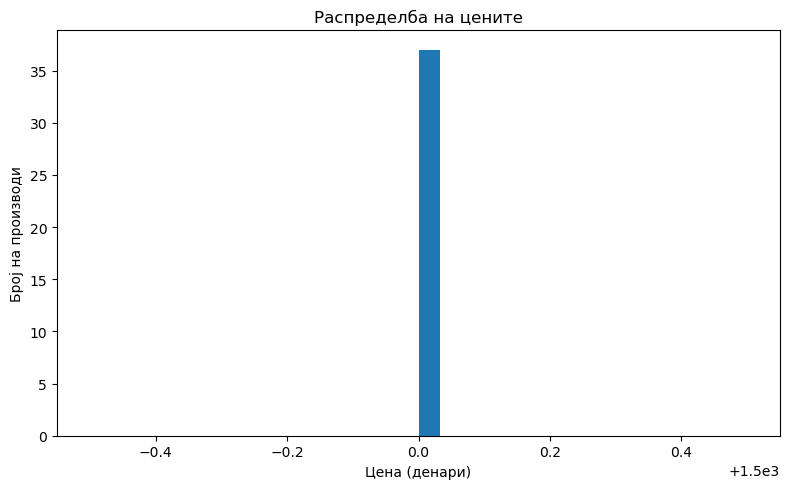

In [61]:
#Хистограм на цените
plt.figure(figsize=(8, 5))
plt.hist(cleanedData['Цена'].dropna(), bins=30)
plt.title('Распределба на цените')
plt.xlabel('Цена (денари)')
plt.ylabel('Број на производи')
show_plot()

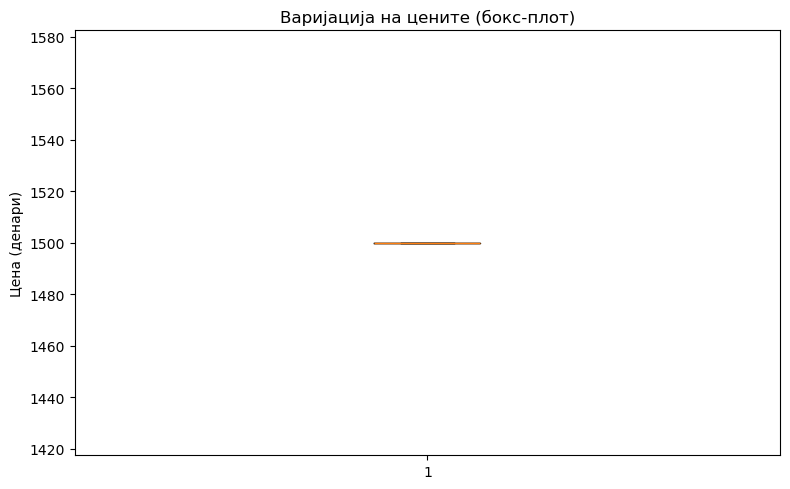

In [62]:
#Бокс-плот на цените
plt.figure(figsize=(8, 5))
plt.boxplot(cleanedData['Цена'].dropna(), vert=True)
plt.title('Варијација на цените (бокс-плот)')
plt.ylabel('Цена (денари)')
show_plot()

In [64]:
cleanedData['Величини_list'] = cleanedData['Величини'].apply(ast.literal_eval)

# 3. Додавање нова колона: број на достапни величини
cleanedData['Број_величини'] = cleanedData['Величини_list'].apply(len)

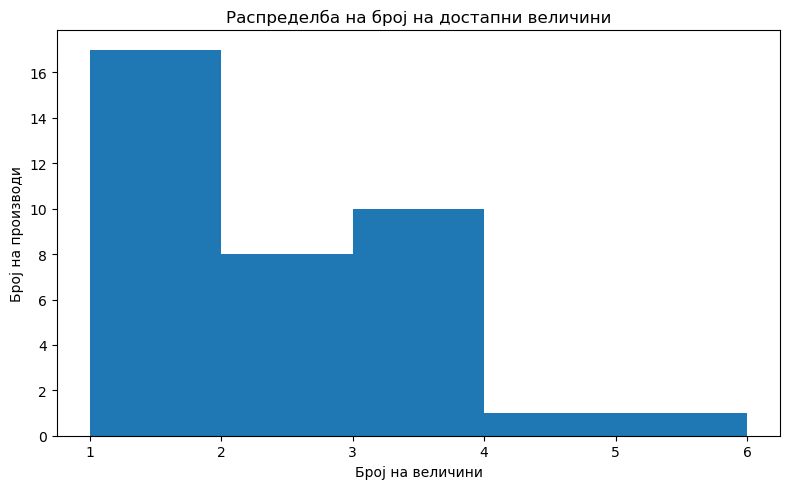

In [66]:
#Хистограм на бројот на достапни величини
plt.figure(figsize=(8, 5))
plt.hist(cleanedData['Број_величини'], bins=range(1, cleanedData['Број_величини'].max() + 2))
plt.title('Распределба на број на достапни величини')
plt.xlabel('Број на величини')
plt.ylabel('Број на производи')
show_plot()

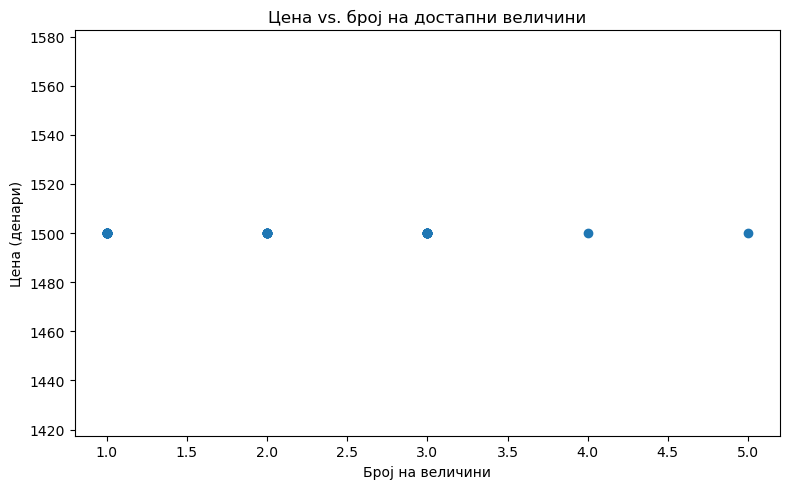

In [68]:
#Скатер-плот: цена vs. број на величини
plt.figure(figsize=(8, 5))
plt.scatter(cleanedData['Број_величини'], cleanedData['Цена'])
plt.title('Цена vs. број на достапни величини')
plt.xlabel('Број на величини')
plt.ylabel('Цена (денари)')
show_plot()

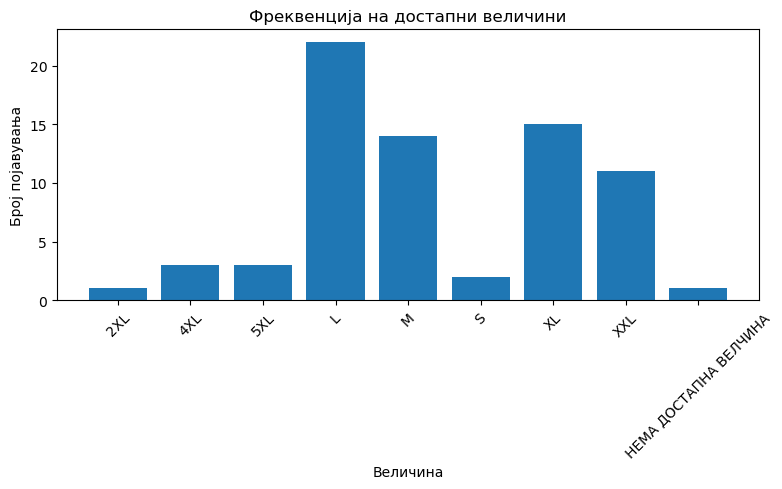

In [69]:
#Дијаграм на фреквенција на достапни величини
all_sizes = [size for sublist in cleanedData['Величини_list'] for size in sublist]
size_counts = pd.Series(all_sizes).value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(size_counts.index, size_counts.values)
plt.title('Фреквенција на достапни величини')
plt.xlabel('Величина')
plt.ylabel('Број појавувања')
plt.xticks(rotation=45)
show_plot()